# Getting Started with PMagPy

To start with, we need to run the following set of commands to check we have installed all the correct packages to start playing with PMagPy

In [2]:
import pmagpy.ipmag as ipmag
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'


Next, we will download some data from the MagIC database (https://www2.earthref.org/MagIC/search) which is where all published paleomag data is stored.  In this case, we're going to look at data from Zhang et al., 2021 'High geomagnetic field intensity recorded by anorthosite xenoliths requires a strongly powered late Mesoproterozoic geodynamo' (https://doi.org/10.7288/V4/MAGIC/19462).

In [3]:
doi = '10.1007/S00445-023-01665-W'
result, magic_file_name = ipmag.download_magic_from_doi(doi)

19640/magic_contribution_19640.txt extracted to magic_contribution.txt 



We can now 'unpack' all the data in this file, so that we can start to look at the data

In [4]:
ipmag.download_magic(infile='magic_contribution.txt')

working on:  'contribution\r'
1  records written to file  C:\Users\cioni\My Drive\Oxford\Teaching\Getting started with PMagPy\contribution.txt
  data put in  C:\Users\cioni\My Drive\Oxford\Teaching\Getting started with PMagPy\contribution.txt
working on:  'locations\r'
4  records written to file  C:\Users\cioni\My Drive\Oxford\Teaching\Getting started with PMagPy\locations.txt
  data put in  C:\Users\cioni\My Drive\Oxford\Teaching\Getting started with PMagPy\locations.txt
working on:  'sites\r'
7  records written to file  C:\Users\cioni\My Drive\Oxford\Teaching\Getting started with PMagPy\sites.txt
  data put in  C:\Users\cioni\My Drive\Oxford\Teaching\Getting started with PMagPy\sites.txt
working on:  'samples\r'
71  records written to file  C:\Users\cioni\My Drive\Oxford\Teaching\Getting started with PMagPy\samples.txt
  data put in  C:\Users\cioni\My Drive\Oxford\Teaching\Getting started with PMagPy\samples.txt
working on:  'specimens\r'
178  records written to file  C:\Users\cioni\

True

Now we will plot an equal area plot, a Zijderveld plot and a demagnetization plot of the first sample.  If you want to generate these plots for all the samples then remove the n_plots=1 term.

-I- Using online data model
-I- Getting method codes from earthref.org
-I- Importing controlled vocabularies from https://earthref.org


(True, [])

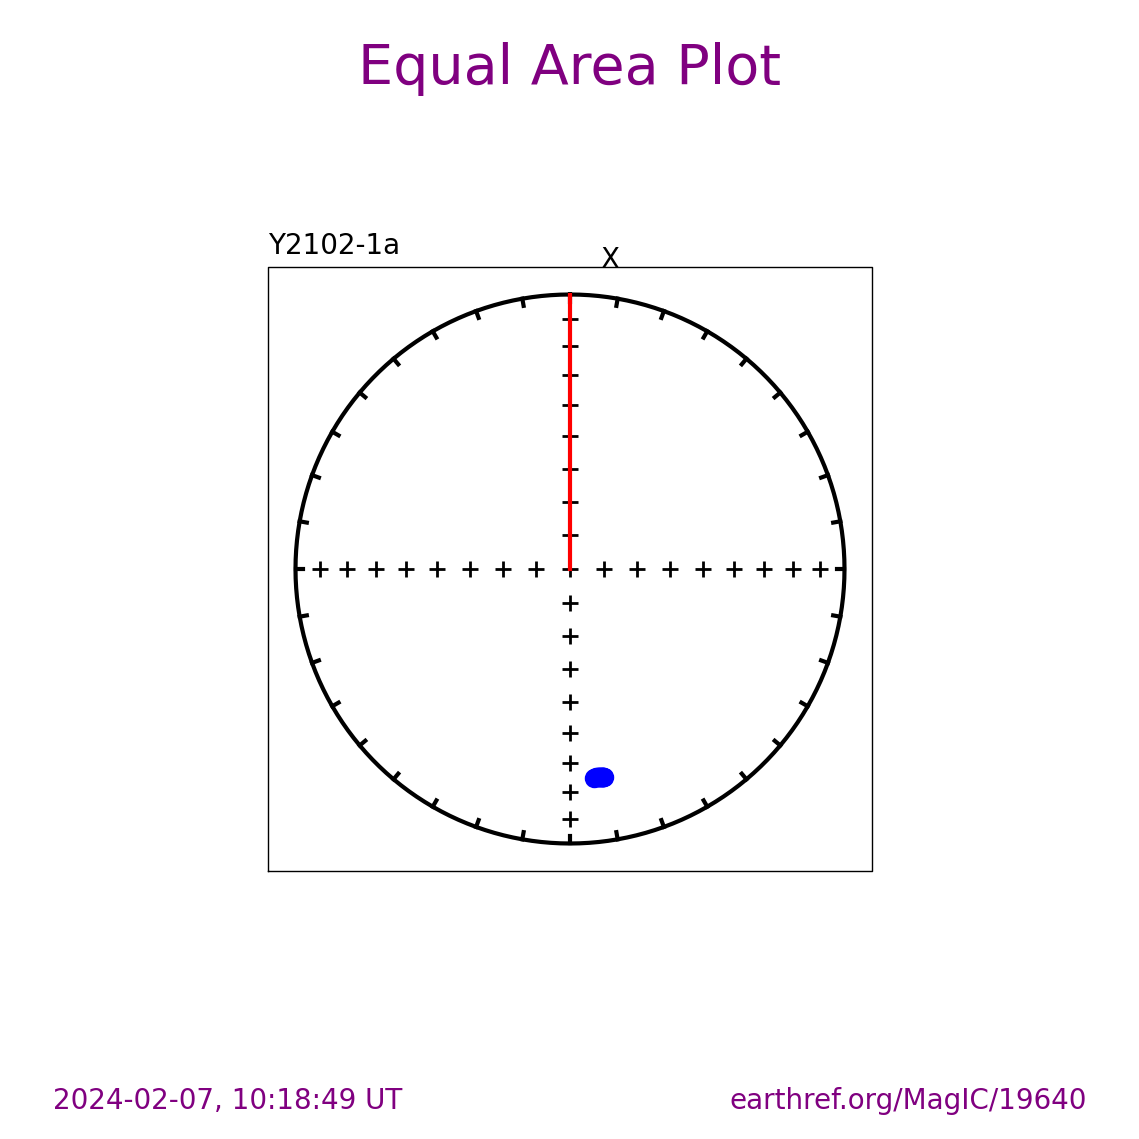

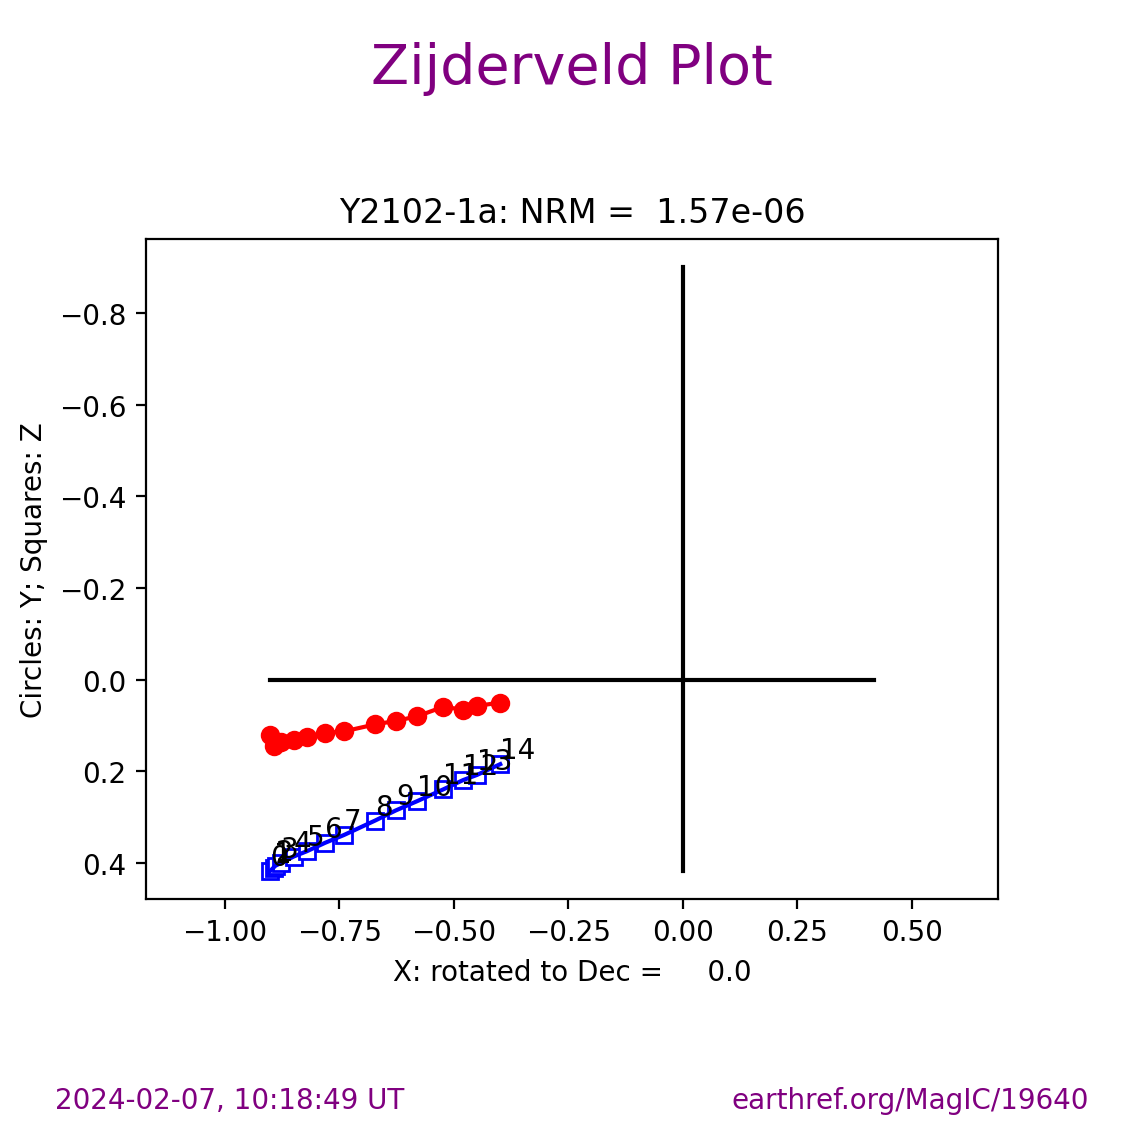

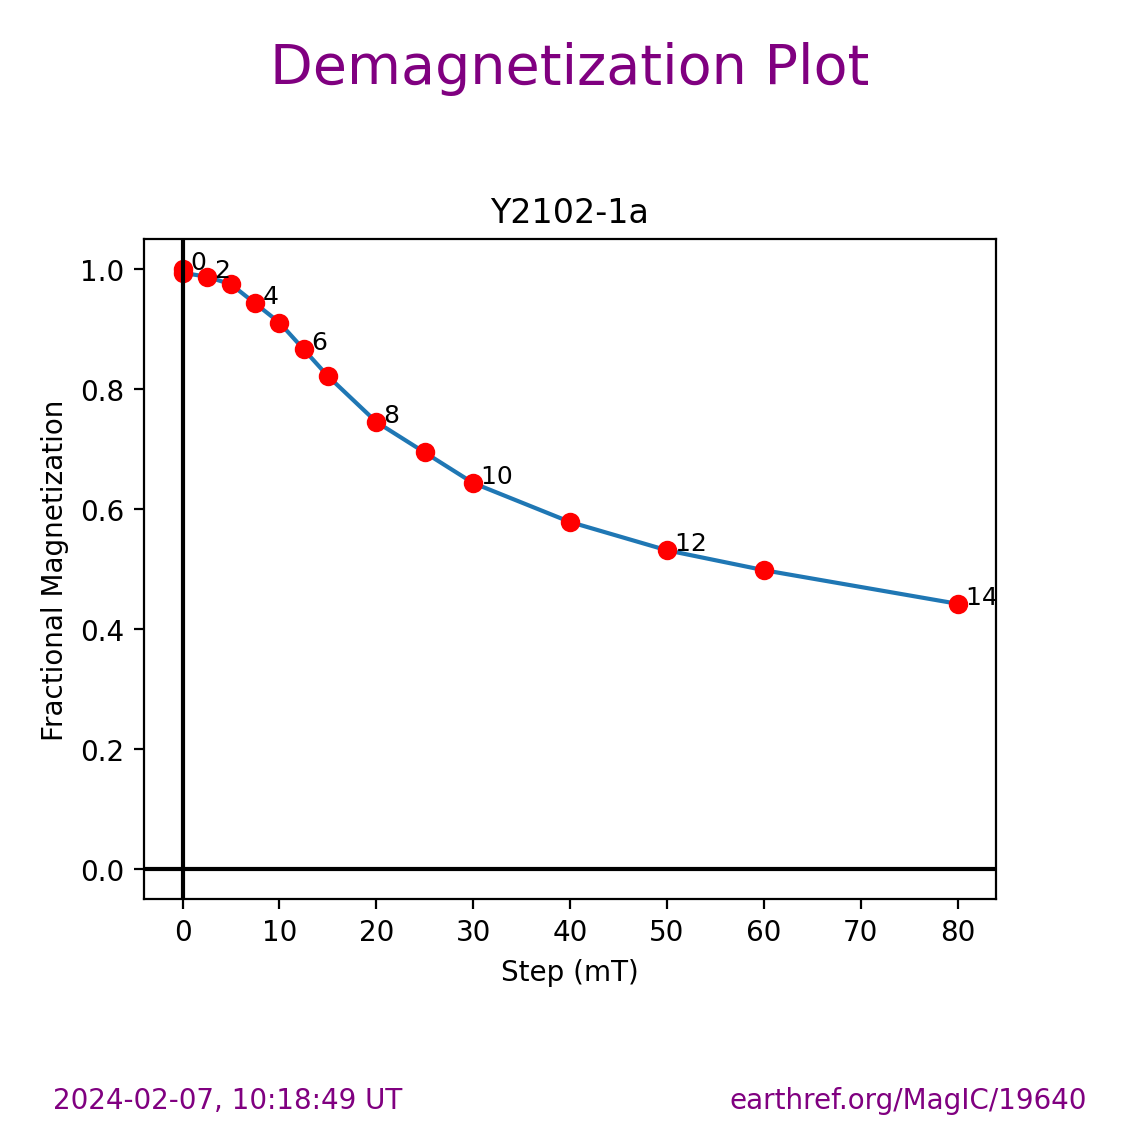

In [5]:
ipmag.zeq_magic(save_plots=False, n_plots=1)

We can now read in the data tables, so we can look at specific samples

In [6]:
measurements = pd.read_csv('measurements.txt',sep='\t',header=1)
sites = pd.read_csv('sites.txt',sep='\t',header=1)
specimens = pd.read_csv('specimens.txt',sep='\t',header=1)
ages = pd.read_csv('ages.txt',sep='\t',header=1)

To see what the structure of each data file looks like, we can print the first 5 rows using the following command.  Let's have a look at the specimens file. N.B, youc can also import these .txt files into Excel to look at all the data.

In [7]:
specimens.head()

,analysts,citations,dir_bfv_dec,dir_bfv_inc,dir_comp,dir_dang,dir_dec,dir_inc,dir_mad_free,dir_n_comps,...,int_corr,lithologies,meas_step_max,meas_step_min,meas_step_unit,method_codes,result_quality,sample,software_packages,specimen
0,AFP,This study,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Rhyolite,NaN,NaN,NaN,LP-NOMAG,g,Y2102-1,NaN,Y2102-1a
1,NaN,This study,NaN,NaN,Y212_chrm,0.0,343.0,66.2,0.6,1.0,...,u,Rhyolite,0.08,0.005,T,LP-DIR-AF:DE-BFL-A:DA-DIR-GEO,g,Y2102-1,pmagpy-4.2.108: demag_gui,Y2102-1a
2,NaN,This study,NaN,NaN,Y212_chrm,0.3,4.2,66.2,1.0,1.0,...,u,Rhyolite,853.00,473.000,K,LP-DIR-T:DE-BFL:DA-DIR-GEO,g,Y2102-2,pmagpy-4.2.108: demag_gui,Y2102-2a
3,AFP,This study,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Rhyolite,NaN,NaN,NaN,LP-NOMAG,g,Y2102-2,NaN,Y2102-2a
4,AFP,This study,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Rhyolite,NaN,NaN,NaN,LP-NOMAG,g,Y2102-2,NaN,Y2102-2b


We can now look at a list that just corresponds to the names of the specimens that were measured

In [8]:
print (specimens['specimen'])

0      Y2102-1a
1      Y2102-1a
2      Y2102-2a
3      Y2102-2a
4      Y2102-2b
         ...   
173     Y217-7b
174     Y217-8a
175     Y217-8a
176     Y217-9a
177     Y217-9a
Name: specimen, Length: 178, dtype: object


If we want to look at a specific specimen, we can print a specific row number

In [9]:
print (specimens['specimen'][26])

Y211-3a


And then we can plot up the data for that specimen

(True, [])

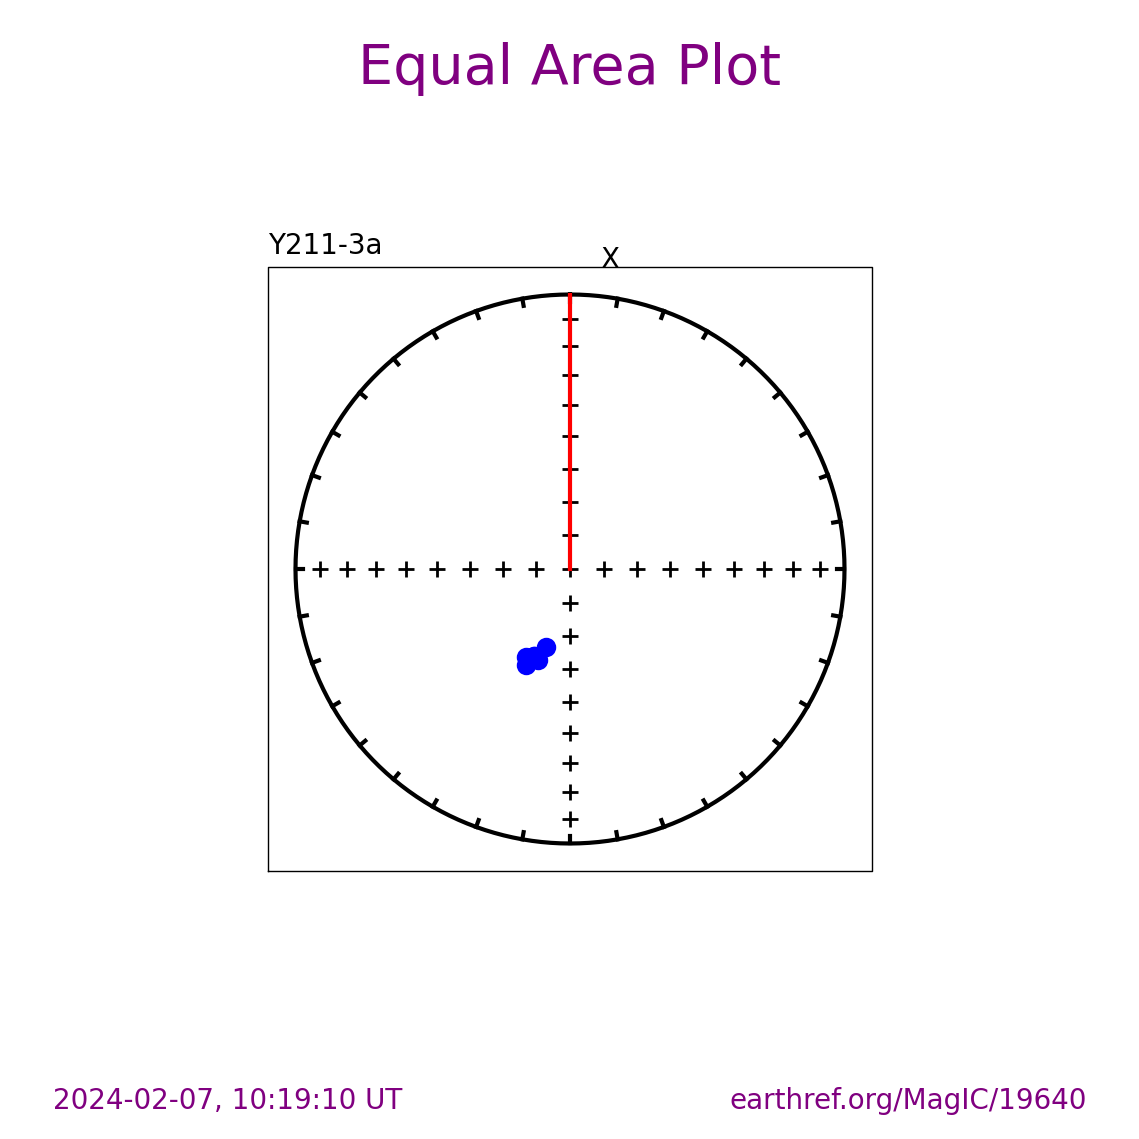

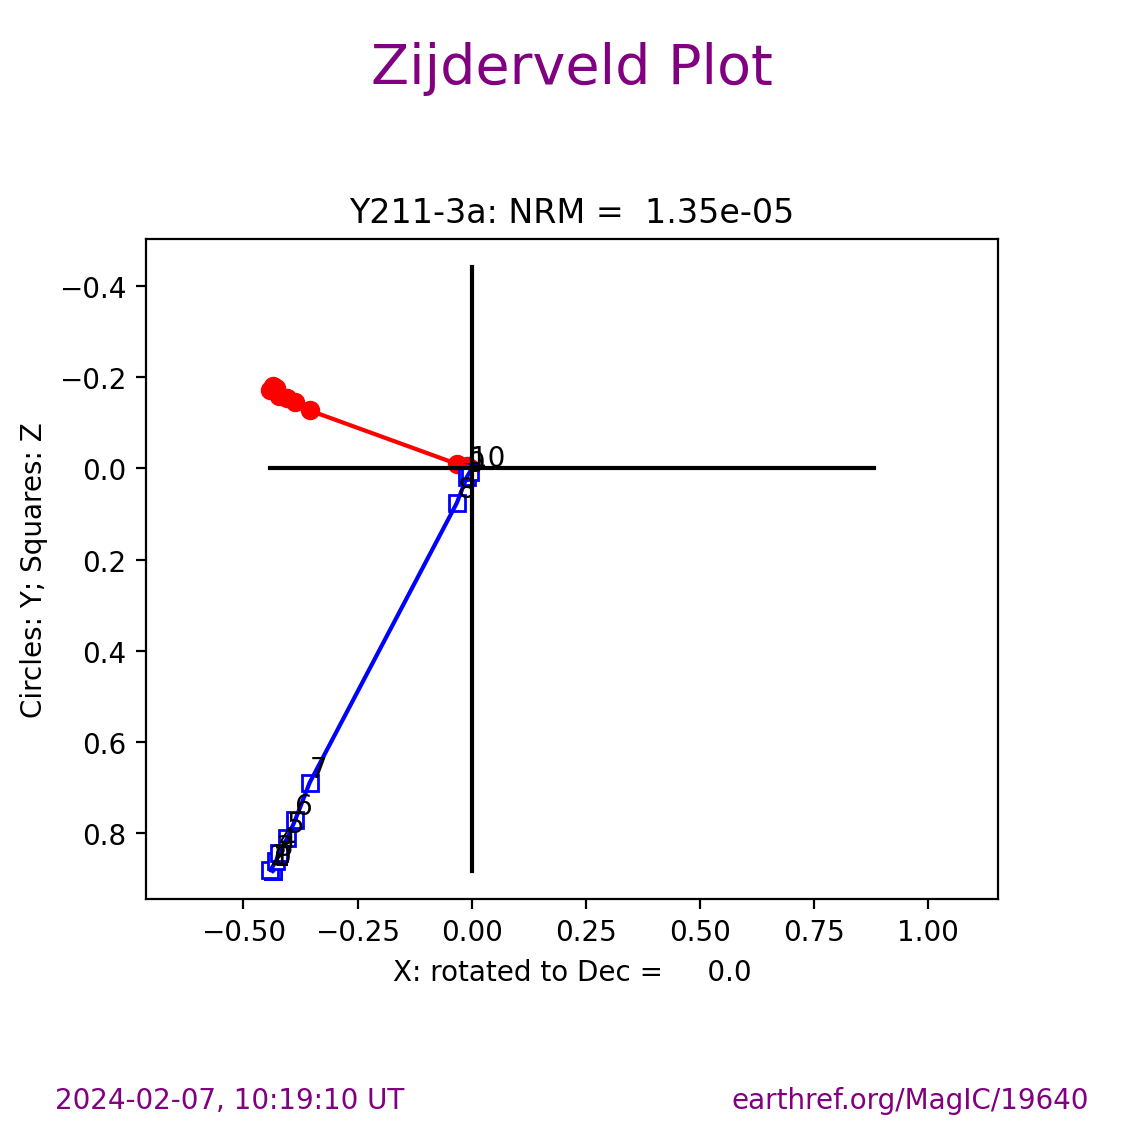

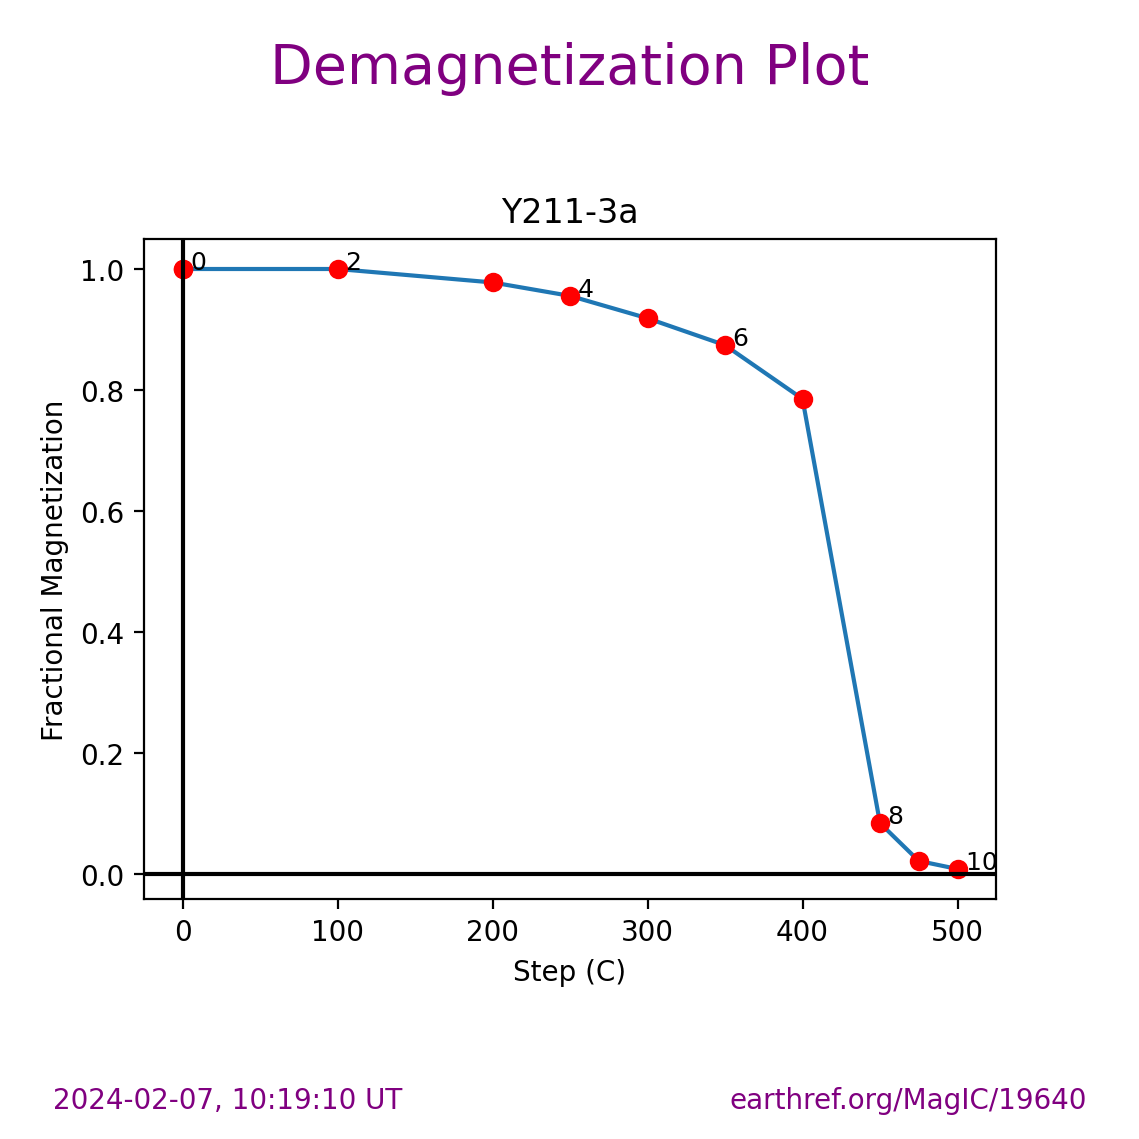

In [10]:
ipmag.zeq_magic(specimen='Y211-3a',save_plots=False)

Next, we can filter the data to look at a specific point in the demagnetization.  Using the command below, we're only going to look at the data prior to thermal demagnetization (i.e., at 273 K = 0 C) or AF demagnetizatoin (i.e., AF field = 0 mT)

In [15]:
measurements_0C = measurements[(measurements['treat_temp']==273) & (measurements['treat_ac_field']==0)]

In [16]:
measurements_0C.head()

,analysts,citations,description,dir_csd,dir_dec,dir_inc,experiment,instrument_codes,magn_moment,magn_x_sigma,...,sequence,software_packages,specimen,standard,treat_ac_field,treat_dc_field,treat_dc_field_phi,treat_dc_field_theta,treat_step_num,treat_temp
0,AFP,This study,NaN,0.3,172.4,24.7,Y2102-1a_LP-DIR-AF,lancaste 2022-03-24 15:22:21,1.570000e-06,9.640000e-09,...,1,pmagpy-4.2.50,Y2102-1a,u,0.0,0,0,0,NaN,273.0
1,AFP,This study,NaN,0.4,170.8,24.4,Y2102-1a_LP-DIR-AF,lancaste 2022-04-19 15:00:04,1.560000e-06,1.080000e-08,...,2,pmagpy-4.2.50,Y2102-1a,u,0.0,0,0,0,1.0,273.0
15,AFP,This study,NaN,0.3,165.9,26.4,Y2102-2a_LP-DIR-T,lancaste 2022-03-24 15:24:42,7.660000e-07,5.420000e-09,...,16,pmagpy-4.2.50,Y2102-2a,u,0.0,0,0,0,NaN,273.0
16,AFP,This study,NaN,1.0,167.0,25.7,Y2102-2a_LP-DIR-T,lancaste 2022-04-27 15:02:08,7.670000e-07,8.270000e-09,...,17,pmagpy-4.2.50,Y2102-2a,u,0.0,0,0,0,1.0,273.0
30,AFP,This study,NaN,0.3,165.5,25.7,Y2102-2b_LP-DIR-T,NaN,4.760000e-07,3.730000e-09,...,31,pmagpy-4.2.50,Y2102-2b,u,0.0,0,0,0,NaN,273.0


We can then compare the directions between samples for this temperature 

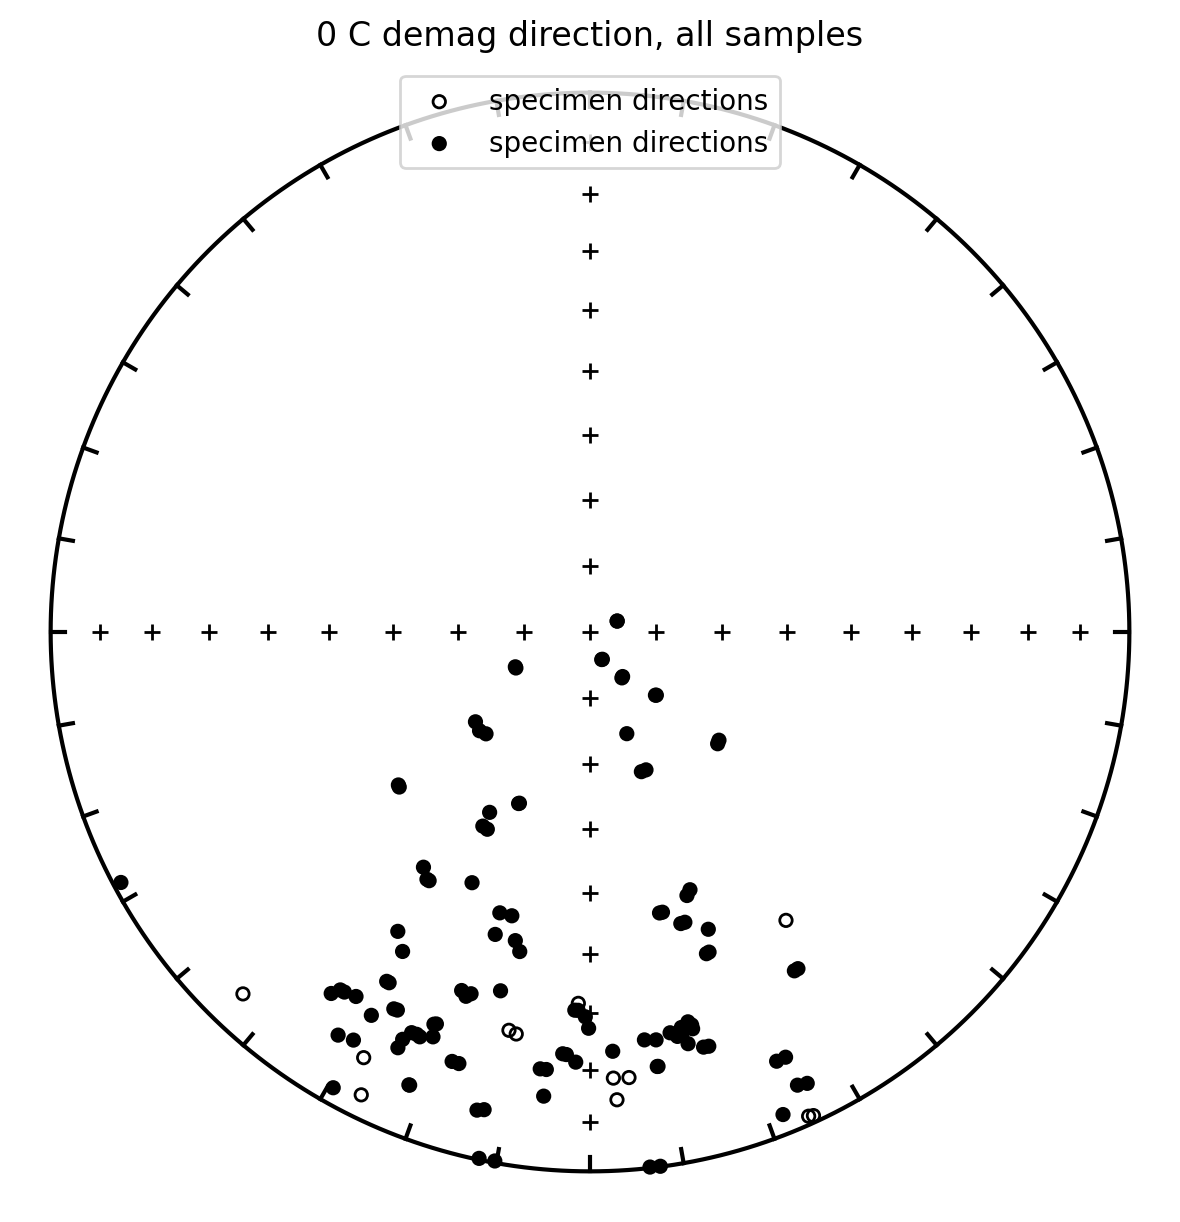

In [17]:
plt.figure(figsize = (6,6))
ipmag.plot_net()

ipmag.plot_di(dec=measurements_0C['dir_dec'].tolist(), 
              inc=measurements_0C['dir_inc'].tolist(), 
              label='specimen directions')


plt.title('0 C demag direction, all samples')
plt.legend(loc='upper center')
plt.show()

We can now plot the same thing again, but include Fisher statistics to see how well defined the direction is. To learn more about statistical analyses of paleomagnetic data you can download a PDF with all the details here https://earthref.org/PmagPy/SPD/downloads.html 

{'dec': 186.86642129480748, 'inc': 31.602425864291735, 'n': 124, 'r': 104.83626408238288, 'k': 6.418372729031753, 'alpha95': 5.441690932662482, 'csd': 31.972202275371707}


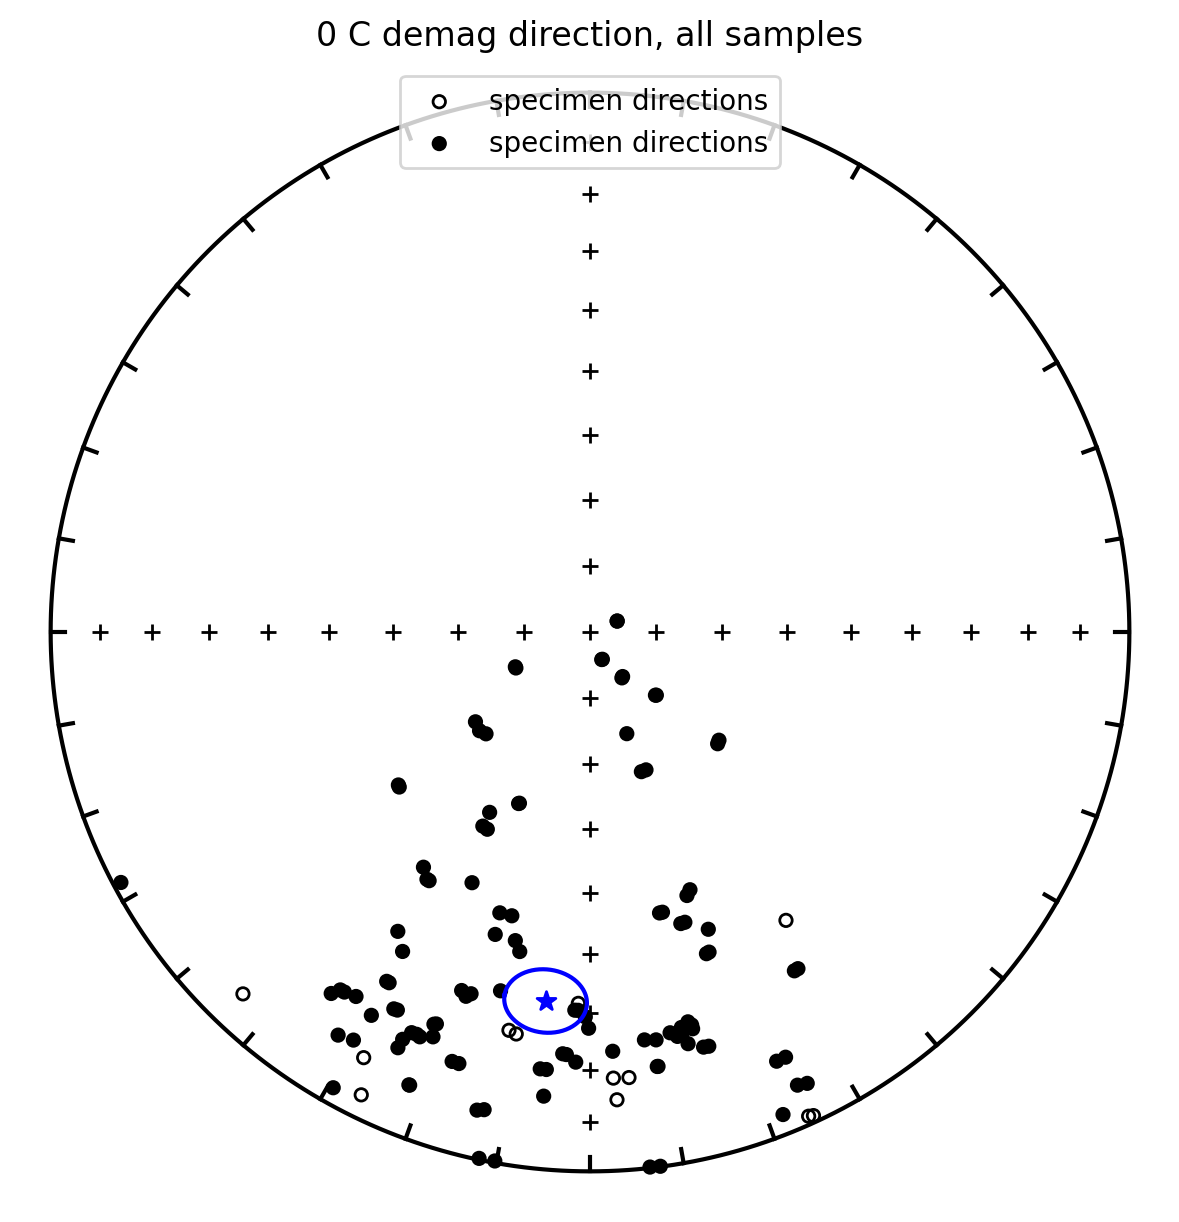

In [19]:
plt.figure(figsize = (6,6))
ipmag.plot_net()

#calculate Fisher mean and alpha 95
fisher=ipmag.fisher_mean(dec=measurements_0C['dir_dec'].tolist(),inc=measurements_0C['dir_inc'].tolist())
print(fisher)
# plots stereonet of data
ipmag.plot_di(dec=measurements_0C['dir_dec'].tolist(), 
              inc=measurements_0C['dir_inc'].tolist(), 
              label='specimen directions')
ipmag.plot_di_mean(dec=fisher['dec'],inc=fisher['inc'],a95=fisher['alpha95'],\
                  marker='*',color='blue',markersize=50)

plt.title('0 C demag direction, all samples')
plt.legend(loc='upper center')
plt.show()



Now, we can do the same thing but look at data for the final demag step - the Curie temperature for magnetite (580 C)

In [20]:
measurements_580C = measurements[measurements['treat_temp']==853] 

{'dec': 188.22993269597728, 'inc': 37.32278146011498, 'n': 7, 'r': 6.536597330294772, 'k': 12.947702704899447, 'alpha95': 17.4282159883228, 'csd': 22.510682338007133}


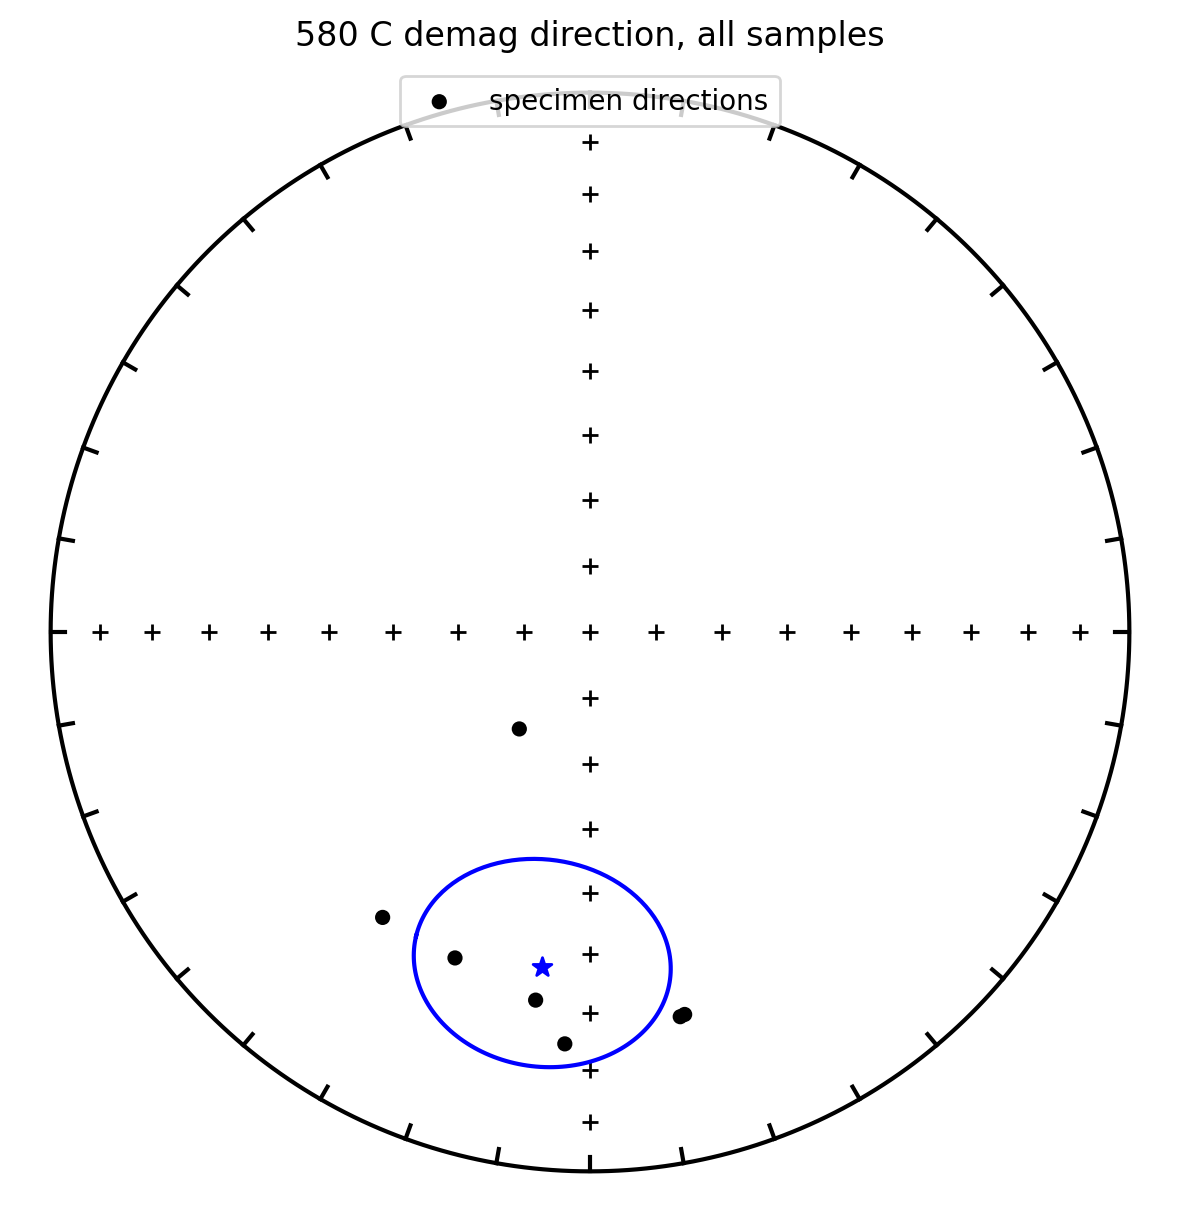

In [21]:
plt.figure(figsize = (6,6))
ipmag.plot_net()

#calculate Fisher mean and alpha 95
fisher=ipmag.fisher_mean(dec=measurements_580C['dir_dec'].tolist(),inc=measurements_580C['dir_inc'].tolist())
print(fisher)
# plots stereonet of data
ipmag.plot_di(dec=measurements_580C['dir_dec'].tolist(), 
              inc=measurements_580C['dir_inc'].tolist(), 
              label='specimen directions')
ipmag.plot_di_mean(dec=fisher['dec'],inc=fisher['inc'],a95=fisher['alpha95'],\
                  marker='*',color='blue',markersize=50)

plt.title('580 C demag direction, all samples')
plt.legend(loc='upper center')
plt.show()